In [133]:
# setup e test librerie
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Random forest

XGboost

evaluation

overfitting

In [134]:
mushrooms = pd.read_csv("mushrooms_cleaned.csv")

y = mushrooms["is-edible"]
X = mushrooms.drop(columns="is-edible")

mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18356 entries, 0 to 18355
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is-edible             18356 non-null  bool   
 1   cap-diameter          18356 non-null  float64
 2   cap-shape             18356 non-null  float64
 3   cap-surface           18356 non-null  float64
 4   cap-color             18356 non-null  float64
 5   does-bruise-or-bleed  18356 non-null  bool   
 6   gill-attachment       18356 non-null  float64
 7   gill-spacing          18356 non-null  float64
 8   gill-color            18356 non-null  float64
 9   stem-height           18356 non-null  float64
 10  stem-width            18356 non-null  float64
 11  stem-root             18356 non-null  float64
 12  stem-surface          18356 non-null  float64
 13  stem-color            18356 non-null  float64
 14  veil-color            18356 non-null  float64
 15  has-ring           

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=1/3,
    random_state=42
)

In [136]:
def print_eval(X, y, model):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy/Score: {accuracy:.5}")
    print("Classification report")
    print(classification_report(y, y_pred))

In [137]:
def print_coefficients(classifier):
    print("Coefficients")
    for i in range(len(X.columns)):
        print(f"{X.columns[i]}: {classifier.coef_[0][i]}")

In [138]:
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver="saga"))
])
model.fit(X_train, y_train)

print_coefficients(model.named_steps["lr"])
print_eval(X_val, y_val, model)

Coefficients
cap-diameter: 0.9851679794175265
cap-shape: 0.33532915466057256
cap-surface: 0.5678191854202835
cap-color: 0.19304587563032755
does-bruise-or-bleed: -0.19195090829418168
gill-attachment: -0.1319836360248264
gill-spacing: -0.28321640268420717
gill-color: -0.44488031864353017
stem-height: -0.13495368203491317
stem-width: 1.112253192583471
stem-root: -0.27194241959962323
stem-surface: -0.5508439318924407
stem-color: -0.06761726444906357
veil-color: 5.526129519358212
has-ring: -0.5228303588498777
ring-type: -0.36606392245467606
spore-print-color: 0.34208222786473913
habitat: 0.7498509778683441
season: 0.07252646951174203
Accuracy/Score: 0.81566
Classification report
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      3933
        True       0.77      0.70      0.73      2186

    accuracy                           0.82      6119
   macro avg       0.80      0.79      0.79      6119
weighted avg       0.81      0.82      0.81 

Accuracy/Score: 0.83886
Classification report
              precision    recall  f1-score   support

       False       0.89      0.86      0.87      3933
        True       0.76      0.80      0.78      2186

    accuracy                           0.84      6119
   macro avg       0.82      0.83      0.83      6119
weighted avg       0.84      0.84      0.84      6119



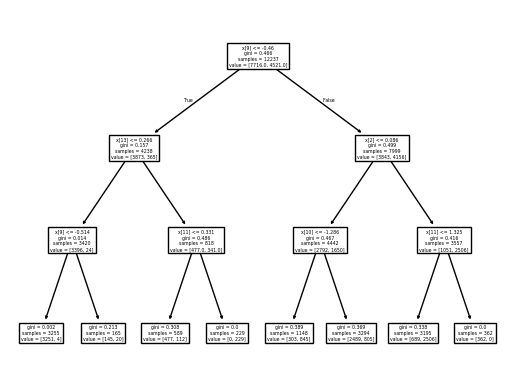

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = Pipeline([
    ("scaler", StandardScaler()),
    ("dtc", DecisionTreeClassifier(max_depth=3))
])
model.fit(X_train, y_train)

plot_tree(model.named_steps["dtc"])
print_eval(X_val, y_val, model)

In [140]:
from sklearn.linear_model import RidgeClassifier

model = Pipeline([
    ("scaler", StandardScaler()),
    ("rc", RidgeClassifier(alpha=0.5))
])
model.fit(X_train, y_train)

print_coefficients(model.named_steps["rc"])
print_eval(X_val, y_val, model)

Coefficients
cap-diameter: 0.25996327995550966
cap-shape: 0.11103560947775117
cap-surface: 0.11454321505005634
cap-color: 0.06788384242816636
does-bruise-or-bleed: -0.06151360949594369
gill-attachment: -0.10051601634659926
gill-spacing: -0.11673893073383568
gill-color: -0.10767477226655803
stem-height: 0.0024208519437873234
stem-width: 0.2966675335613977
stem-root: -0.20236028019198943
stem-surface: -0.1158250843449669
stem-color: 0.04146382321193305
veil-color: 0.2455274195474239
has-ring: 0.04516007814015538
ring-type: -0.12709620552025208
spore-print-color: 0.007675659703861884
habitat: 0.15194876521121928
season: 0.002662069247182252
Accuracy/Score: 0.81026
Classification report
              precision    recall  f1-score   support

       False       0.84      0.87      0.85      3933
        True       0.75      0.71      0.73      2186

    accuracy                           0.81      6119
   macro avg       0.80      0.79      0.79      6119
weighted avg       0.81      0.81   

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

kf = KFold(3, shuffle=True, random_state=42)
skf = StratifiedKFold(3, shuffle=True, random_state=42)

model = Pipeline([
    ("scaler", None),
    ("lr", LogisticRegression(solver="saga"))
])
grid = [
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": [None]
    },
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": ["l2", "l1"],
        "lr__C": np.logspace(-2, 2, 5)
    },
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": ["elasticnet"],
        "lr__C": np.logspace(-2, 2, 5),
        "lr__l1_ratio": [0.2, 0.5]
    }
]
# gs = GridSearchCV(model, grid, cv=skf)
# gs.fit(X, y)
# pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

batch size aiuta tantissimo

In [142]:
from sklearn.neural_network import MLPClassifier

model = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(batch_size=50, activation="relu", random_state=42))
])
grid = {
    "mlp__hidden_layer_sizes": [(4, 4), 8],
}
gs = GridSearchCV(model, grid, cv=skf)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.867264,0.041913,0.006208,0.000495,"(4, 4)","{'mlp__hidden_layer_sizes': (4, 4)}",1.0,1.0,1.0,1.0,0.0,1
1,2.177128,0.063868,0.006124,0.000507,8,{'mlp__hidden_layer_sizes': 8},1.0,1.0,1.0,1.0,0.0,1
